In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celeb-df-v2/List_of_testing_videos.txt
/kaggle/input/celeb-df-v2/YouTube-real/00238.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00152.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00269.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00209.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00297.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00096.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00255.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00230.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00259.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00012.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00219.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00003.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00147.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00241.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00260.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00128.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00243.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00248.mp4
/kaggle/input/celeb-df-v2/YouTube-real/00207.mp4
/kaggle/input/ce

In [31]:
import torch

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Memory Allocated:", round(torch.cuda.memory_allocated(0) / 1e9, 2), "GB")
    print("Memory Cached:", round(torch.cuda.memory_reserved(0) / 1e9, 2), "GB")
    print("CUDA Version:", torch.version.cuda)
    print("GPU Count:", torch.cuda.device_count())
else:
    print("No GPU detected")


GPU Name: Tesla P100-PCIE-16GB
Memory Allocated: 0.0 GB
Memory Cached: 0.0 GB
CUDA Version: 12.1
GPU Count: 1


In [32]:
!pip install -q  dlib face_recognition

In [33]:
!pip install -q "ray[tune]" HEBO mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 71.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.7 MB/

In [6]:
source_real_path = '/kaggle/input/celeb-df-v2/Celeb-real'
dest_real_path = '/kaggle/working/videos/Real'

source_fake_path = '/kaggle/input/celeb-df-v2/Celeb-synthesis'
dest_fake_path = '/kaggle/working/videos/Fake'

In [7]:
def move_files_from_input2output(source_real, source_fake, dest_real, dest_fake):
    os.makedirs(dest_real, exist_ok=True)
    os.makedirs(dest_fake, exist_ok=True)
    
    real_videos = os.listdir(source_real)

    for video in real_videos[:591]:
        source = os.path.join(source_real, video)
        dest = os.path.join(dest_real, video)
        shutil.copy(source, dest)

    fake_videos = os.listdir(source_fake)

    for video in fake_videos[:591]:
        source = os.path.join(source_fake, video)
        dest = os.path.join(dest_fake, video)
        shutil.copy(source, dest)
    print('Done Files Copied')

In [8]:
def min_num_of_frames(real_path, fake_path):
    frame_lengths = []
    for path in os.listdir(real_path):
        vidObj = cv2.VideoCapture(os.path.join(real_path, path))
        length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
        
        frame_lengths.append(length)
    for path in os.listdir(fake_path):
        vidObj = cv2.VideoCapture(os.path.join(fake_path, path))
        length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_lengths.append(length)
        frame_lengths.sort()
    return frame_lengths[1]

In [9]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00


In [22]:
import matplotlib.pyplot as plt


In [10]:
from mtcnn import MTCNN  # Import MTCNN
import cv2  # Import OpenCV

def video_to_faces(path, save_dir, video_num, n_frames=10):
    # Initialize MTCNN detector
    face_detector = MTCNN()
    
    vidObj = cv2.VideoCapture(path)
    length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # don't take videos with less frames
    if length < n_frames:
        return []
    
    # take last n_frames
    frame_indices = np.arange((length // 2), n_frames + (length // 2))
    
    # Lists to store faces and their corresponding frame indices
    detected_faces = []
    count = 0
    
    video_folder = os.path.join(save_dir, f'video{video_num}')
    os.makedirs(video_folder, exist_ok=True)
    
    while True:
        ret, frame = vidObj.read()
        if not ret:
            break
        
        if count in frame_indices:
            # MTCNN expects RGB images
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Detect faces
            faces = face_detector.detect_faces(rgb_frame)
            
            # If faces are detected
            if faces:
                # Find the largest face (by area)
                largest_face = max(faces, key=lambda face: face['box'][2] * face['box'][3])
                
                # Extract the box coordinates
                x, y, width, height = largest_face['box']
                
                # Crop face
                face_img = frame[y:y+height, x:x+width]
                
                if face_img.size > 0:
                    face_img = cv2.resize(face_img, (224, 224))
                    
                    # Save face
                    face_filename = os.path.join(video_folder, f'face_{count+1}.jpg')
                    cv2.imwrite(face_filename, face_img)
                    
                    # Store face for return
                    detected_faces.append(face_img)
        
        count += 1
    
    vidObj.release()
    
    # don't take video with less frames than target
    if len(detected_faces) != n_frames:
        # Delete the video folder if it doesn't have the correct number of faces
        try:
            shutil.rmtree(video_folder)
            print(f"Deleted folder {video_folder} due to incorrect number of faces")
        except Exception as e:
            print(f"Error deleting folder {video_folder}: {e}")
        return []
    
    return detected_faces

In [11]:
def video_to_faces(path, save_dir, video_num, n_frames=10, frame_gap=5, padding_factor=0.4):
    # Initialize MTCNN detector
    face_detector = MTCNN()
    
    vidObj = cv2.VideoCapture(path)
    total_frames = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate required frames for n_frames with frame_gap
    required_frames = (n_frames - 1) * frame_gap + n_frames
    
    # don't take videos with less frames than required
    if total_frames < required_frames:
        return []
    
    # Calculate start frame (centered in video)
    start_frame = (total_frames - required_frames) // 2
    
    # Generate frame indices with gap
    frame_indices = [start_frame + i * (frame_gap + 1) for i in range(n_frames)]
    
    # Lists to store faces
    detected_faces = []
    count = 0
    
    video_folder = os.path.join(save_dir, f'video{video_num}')
    os.makedirs(video_folder, exist_ok=True)
    
    while True:
        ret, frame = vidObj.read()
        if not ret:
            break
        
        if count in frame_indices:
            # MTCNN expects RGB images
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Detect faces
            faces = face_detector.detect_faces(rgb_frame)
            
            # If faces are detected
            if faces:
                # Find the largest face (by area)
                largest_face = max(faces, key=lambda face: face['box'][2] * face['box'][3])
                
                # Extract the box coordinates
                x, y, width, height = largest_face['box']
                
                # Calculate padding
                pad_w = int(width * padding_factor)
                pad_h = int(height * padding_factor)
                
                # Calculate new coordinates with padding
                new_x = max(0, x - pad_w)
                new_y = max(0, y - pad_h)
                new_width = min(frame.shape[1] - new_x, width + 2*pad_w)
                new_height = min(frame.shape[0] - new_y, height + 2*pad_h)
                
                # Crop face with padding
                face_img = frame[new_y:new_y+new_height, new_x:new_x+new_width]
                
                if face_img.size > 0:
                    face_img = cv2.resize(face_img, (224, 224))
                    
                    # Save face
                    face_filename = os.path.join(video_folder, f'face_{len(detected_faces)+1}.jpg')
                    cv2.imwrite(face_filename, face_img)
                    
                    # Store face for return
                    detected_faces.append(face_img)
        
        count += 1
    
    vidObj.release()
    
    # don't take video with less frames than target
    if len(detected_faces) != n_frames:
        # Delete the video folder if it doesn't have the correct number of faces
        try:
            shutil.rmtree(video_folder)
            print(f"Deleted folder {video_folder} due to incorrect number of faces")
        except Exception as e:
            print(f"Error deleting folder {video_folder}: {e}")
        return []
    
    return detected_faces

In [79]:
def plot_training_history(history_dic):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    ax1.plot(history_dic['train_loss'], label='Training Loss', color='blue')
    ax1.plot(history_dic['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.plot(history_dic['train_acc'], label='Training Accuracy', color='blue')
    ax2.plot(history_dic['val_acc'], label='Validation Accuracy', color='red')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [13]:
def evaluate(model, test_ds):
    model.eval()
    y_true = torch.tensor([], dtype=torch.int64).to(device)
    y_pred = torch.tensor([], dtype=torch.int64).to(device)
    
    with torch.no_grad():
        for i, data in enumerate(test_ds):
            x, y = data
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            predictions = torch.where(output >= 0.5, 1, 0)
    
            # Accumulate true labels and predictions
            y_true = torch.cat((y_true, y), dim=0)
            y_pred = torch.cat((y_pred, predictions), dim=0)

        y_true = y_true.cpu()
        y_pred = y_pred.cpu()
            
            
    
    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=["Real", "Fake"])
    print(report)

    matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(matrix, annot=True, fmt='.2f', cmap='crest')
    
    # Set custom tick labels
    ax.set_xticklabels(['Real', 'Fake'], rotation=0)
    ax.set_yticklabels(['Real', 'Fake'], rotation=0)

    plt.title('Confussion Matrix')
    plt.show()

In [14]:
from PIL import Image

def display_images_as_table(directory):
    video_num = directory.split('/')[-1]
    image_files = [os.path.join(directory, file) for file in os.listdir(directory)]

    image_files = image_files[:10]
    if len(image_files) < 10:
        print(f"Found only {len(image_files)} images in the directory. Displaying those.")

    rows, cols = 2, 5
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(image_files):

            img = Image.open(image_files[i])
            ax.imshow(img)
            ax.set_title(f"Image {i+1}_{video_num}", fontsize=10)
        else:

            ax.axis('off')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
import os
import shutil

def move_files_from_input2output(source_real, source_fake, dest_real, dest_fake):
    # Ensure source directories exist
    if not os.path.exists(source_real):
        print(f"Error: Source directory '{source_real}' does not exist.")
        return
    if not os.path.exists(source_fake):
        print(f"Error: Source directory '{source_fake}' does not exist.")
        return

    # Ensure destination directories exist (create them if missing)
    os.makedirs(dest_real, exist_ok=True)
    os.makedirs(dest_fake, exist_ok=True)

    # Move real videos
    for video in os.listdir(source_real):
        shutil.copy(os.path.join(source_real, video), os.path.join(dest_real, video))

    # Move fake videos
    for video in os.listdir(source_fake):
        shutil.copy(os.path.join(source_fake, video), os.path.join(dest_fake, video))

    print("✅ Files copied successfully!")

# Example usage (Replace with actual paths)
move_files_from_input2output(source_real_path, source_fake_path, dest_real_path, dest_fake_path)


✅ Files copied successfully!


In [16]:
real_videos = os.listdir(dest_real_path)
for i, path in enumerate(real_videos[:160]):
    video_path = os.path.join(dest_real_path, path)
    video_to_faces(video_path, '/kaggle/working/dataset/train/real', i)

for i, path in enumerate(real_videos[160:190]):
    video_path = os.path.join(dest_real_path, path)
    video_to_faces(video_path, '/kaggle/working/dataset/val/real', i)

for i, path in enumerate(real_videos[190:220]):
    video_path = os.path.join(dest_real_path, path)
    video_to_faces(video_path, '/kaggle/working/dataset/test/real', i)

Deleted folder /kaggle/working/dataset/train/real/video145 due to incorrect number of faces
Deleted folder /kaggle/working/dataset/train/real/video146 due to incorrect number of faces


In [23]:
import os
import concurrent.futures

def process_video(path, save_dir, i):
    video_path = os.path.join(dest_fake_path, path)
    video_to_faces(video_path, save_dir, i)

fake_videos = os.listdir(dest_fake_path)

splits = [
    (fake_videos[:160], "/kaggle/working/dataset/train/fake"),
    (fake_videos[160:190], "/kaggle/working/dataset/val/fake"),
    (fake_videos[190:220], "/kaggle/working/dataset/test/fake"),
]

# Use ThreadPoolExecutor for parallel execution
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:  
    for video_list, save_dir in splits:
        executor.map(lambda path: process_video(path, save_dir, video_list.index(path)), video_list)


KeyboardInterrupt: 

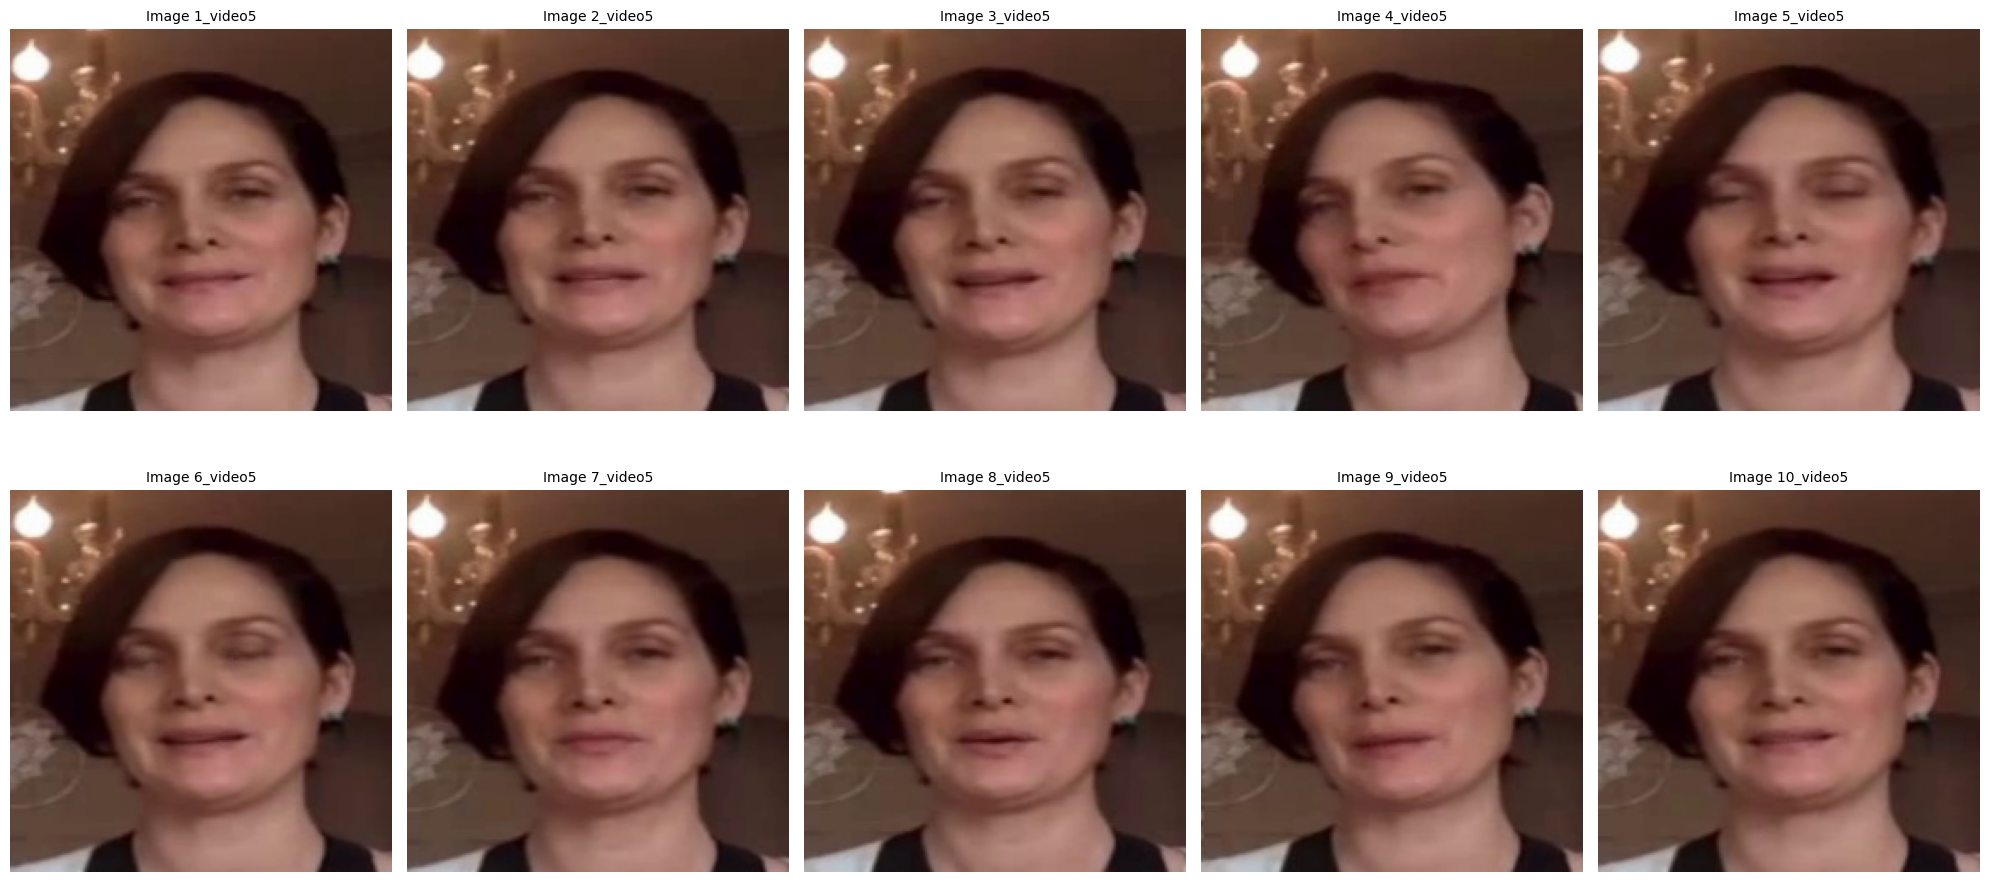

In [24]:
import matplotlib.pyplot as plt

display_images_as_table("/kaggle/working/dataset/train/real/video5")


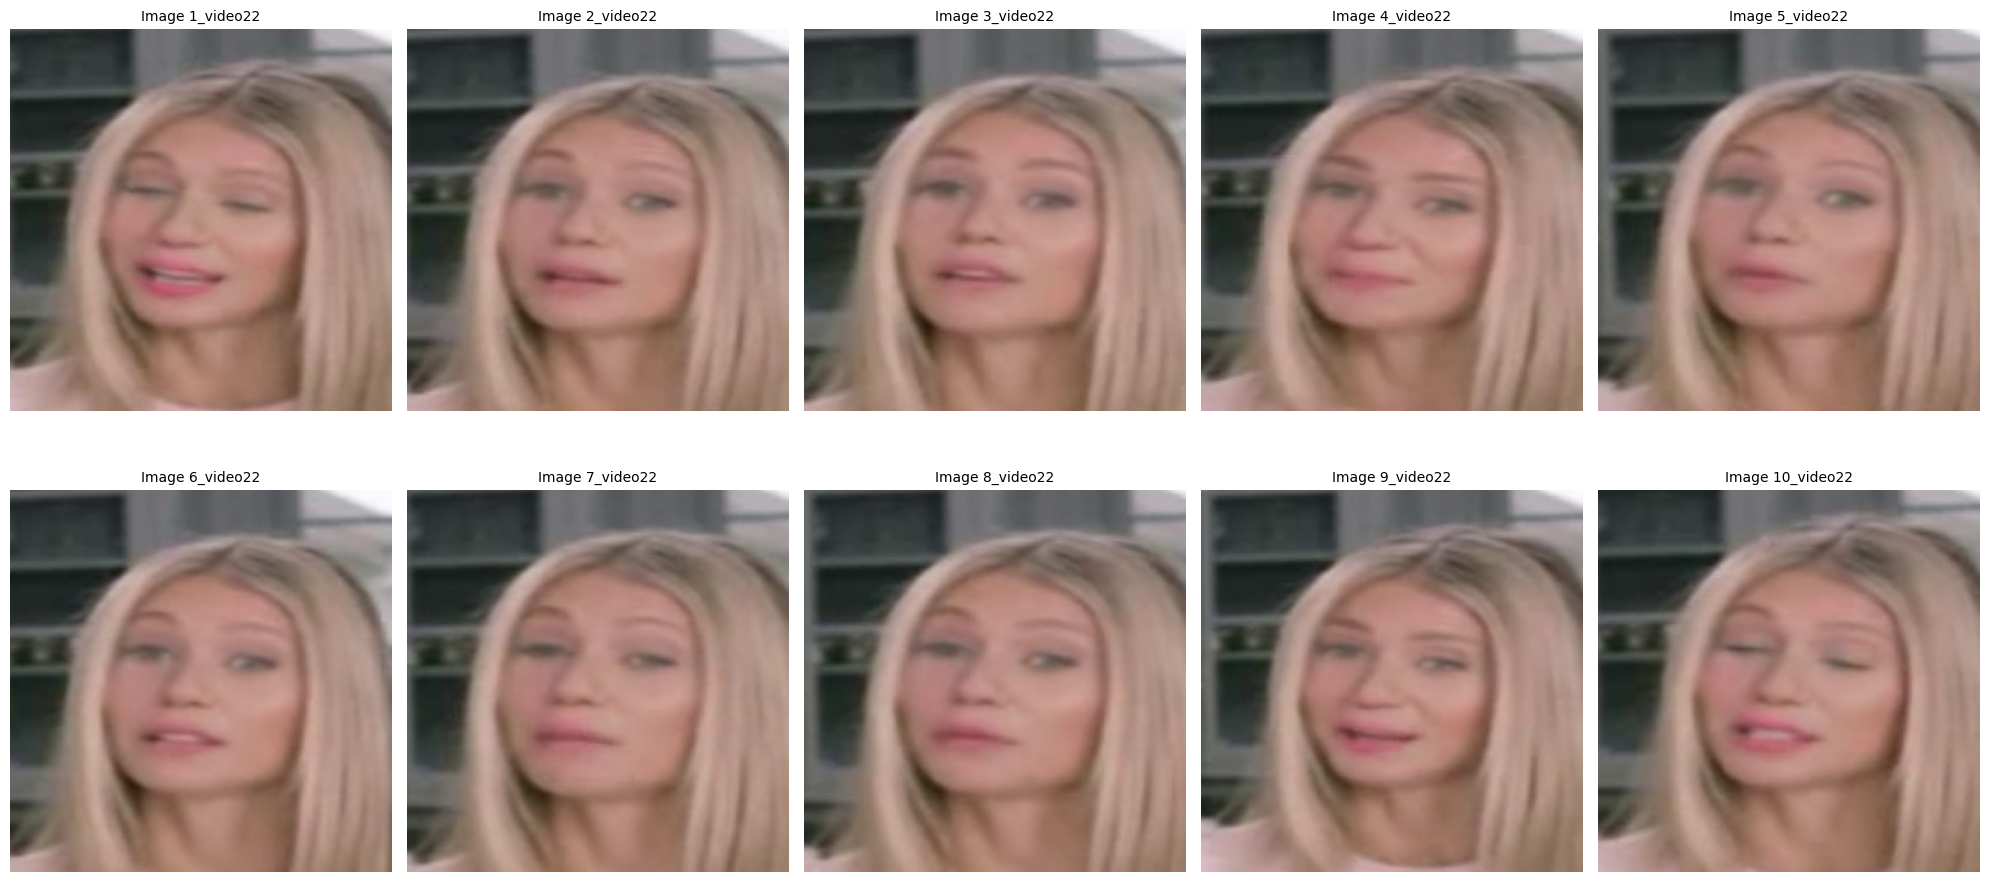

In [25]:
display_images_as_table('/kaggle/working/dataset/train/fake/video22')

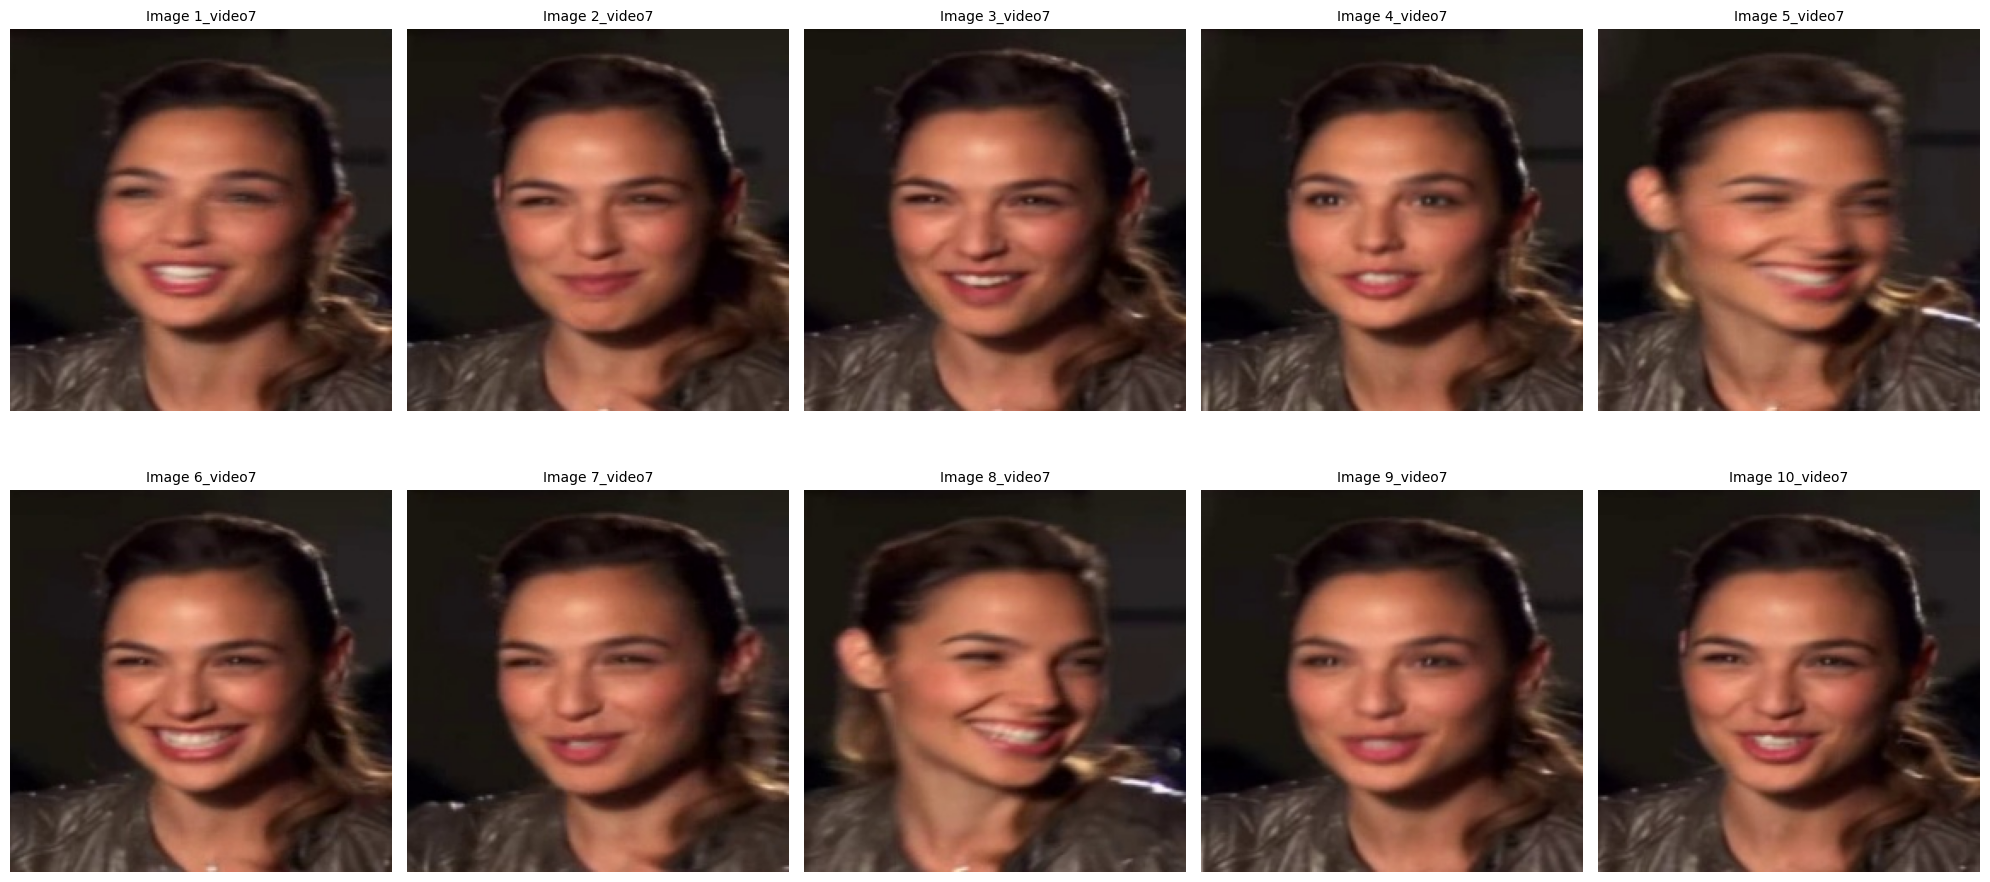

In [27]:
display_images_as_table("/kaggle/working/dataset/train/real/video7")

In [29]:
from torch.utils.data import Dataset

class VideoDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = {'real':0, 'fake':1}
        self.video_paths = []

        for label in self.classes:
            class_dir = os.path.join(self.root_dir, label)
            for video_folder in os.listdir(class_dir):
                self.video_paths.append((os.path.join(class_dir, video_folder), self.classes[label]))
        random.shuffle(self.video_paths)

    
    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path, label = self.video_paths[idx]
        frames = []

        for frame_name in sorted(os.listdir(video_path), key=lambda x: int(x.split('_')[1].split('.')[0])):
            frame_path = os.path.join(video_path, frame_name)
            frame = Image.open(frame_path).convert('RGB')
            if self.transform:
                frame = self.transform(frame)

            frames.append(frame)

        video_tensor = torch.stack(frames)
        return video_tensor, label

In [80]:
def train_model(model, dataloaders, optim, criterion, epochs, device='cuda', display_prints=True, tuning=False, history=True):
    history_dic = {
        'train_loss':[],
        'val_loss':[],
        'train_acc':[],
        'val_acc':[]
    }
    for epoch in range(epochs):
        if display_prints:
            print(f'Epoch {epoch}/{epochs - 1}')
            print('-'*10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_correct = 0.0
            for inputs, labels in dataloaders[phase]:
                if device == 'cuda':
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                labels = labels.float()
                optim.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    output = model(inputs)
                    loss = criterion(output, labels)
                    acc = (torch.where(output >= 0.5, 1, 0) == labels).sum()

                    if phase == 'train':
                        loss.backward()
                        optim.step()
                del inputs, labels, output
                running_loss += loss
                running_correct += acc
            epoch_loss = running_loss / len(dataloaders[phase])
            epoch_acc = running_correct / len(dataloaders[phase].dataset)
            if display_prints:
                print(f'{phase} Loss: {epoch_loss:.3f} Acc: {epoch_acc:.3f}')
            if tuning and phase == "val":
                train.report({"loss":epoch_loss.item(), "accuracy":epoch_acc.item()})
            if history and phase == 'train':
                history_dic['train_loss'].append(epoch_loss)
                history_dic['train_acc'].append(epoch_acc)
            if history and phase == 'val':
                history_dic['val_loss'].append(epoch_loss)
                history_dic['val_acc'].append(epoch_acc)
    if history:
        return history_dic

In [51]:
tune.report({"loss": epoch_loss, "accuracy": epoch_acc})


NameError: name 'epoch_loss' is not defined

In [53]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),                      # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.ToTensor(),                      # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # Normalize
])

In [54]:
import random
from torch.utils.data import DataLoader

dataset = {x:VideoDataset(os.path.join('/kaggle/working/dataset', x), transform=transform) 
           for x, transform in zip(['train', 'val'], [train_transforms, val_transforms])}

dataloaders = {'train':DataLoader(dataset['train'], batch_size=32, shuffle=True, num_workers=4), 
               'val': DataLoader(dataset['val'], batch_size=32, shuffle=False, num_workers=4)}

In [55]:
test_ds = VideoDataset('/kaggle/working/dataset/test', transform=val_transforms)
test_dl = DataLoader(test_ds, batch_size=32, num_workers=4)

In [56]:

import torch.nn as nn
import torch

In [57]:
for x,y in dataloaders['train']:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 10, 3, 224, 224])
torch.Size([32])


In [58]:
from torchvision.models import resnet50, ResNet50_Weights

In [59]:
class ResNet50DeepFake(nn.Module):
    def __init__(self, hidden_dim, reduced_feature_dim, feature_dim=2048):
        super().__init__()

        pretrained_model = resnet50(ResNet50_Weights.DEFAULT)

        self.feature_extractor = nn.Sequential(*[module for name, module in pretrained_model.named_children()][:-1])

        # Added feature reducer
        self.feature_reducer = nn.Sequential(
            nn.Linear(feature_dim, reduced_feature_dim),
            nn.BatchNorm1d(reduced_feature_dim),
            nn.ReLU()
        )
        
        self.rnn = nn.LSTM(
            input_size=reduced_feature_dim,
            hidden_size=hidden_dim, 
            num_layers=1, 
            batch_first=True, 
            bidirectional=True,
            dropout=0.5
        )

        self.classifier = nn.Sequential(
            nn.Linear(2*hidden_dim, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.5),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

        for name, param in self.feature_extractor.named_parameters():
                param.requires_grad = False

    def forward(self, x):
        batch_size, num_frames, c, h, w = x.size()
        
        # extract features
        x = x.view(-1, c, h, w)
        features = self.feature_extractor(x)
        features = features.view(batch_size, num_frames, -1)

        # Reduce feature dimensions
        features = self.feature_reducer(features.reshape(-1, features.size(-1)))
        features = features.view(batch_size, num_frames, -1)
        
        # LSTM processing
        h0 = torch.zeros(2, batch_size, self.rnn.hidden_size).to(features.device)
        c0 = torch.zeros(2, batch_size, self.rnn.hidden_size).to(features.device)
        out, _ = self.rnn(features, (h0, c0))
        
        output = self.classifier(out.mean(dim=1)).squeeze(-1)
        return output

In [63]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [66]:
from sklearn.model_selection import KFold #kfold
import torch
from torch.utils.data import DataLoader, Subset
import os
from torch.utils.data import Dataset, ConcatDataset, SubsetRandomSampler
from torchvision.models import alexnet, AlexNet_Weights, vgg16, VGG16_Weights
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import Compose, Resize, Normalize, ToTensor

kfold_dataset = {x: VideoDataset(os.path.join('/kaggle/working/dataset', x), transform=transform) 
           for x, transform in zip(['train','val'],[train_transforms,val_transforms])}
dataset_concat = ConcatDataset([x for x in kfold_dataset.values()])

k_folds = 3
batch_size = 32
num_workers = 4

folds = {'train': [], 'val': []}

kfold = KFold(n_splits=k_folds, shuffle=True)

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset_concat)):
    train_subset = Subset(dataset_concat, train_idx)
    val_subset = Subset(dataset_concat, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    folds['train'].append(train_loader)
    folds['val'].append(val_loader)


print(f"Total train folds: {len(folds['train'])}")
print(f"Total val folds: {len(folds['val'])}")

Total train folds: 3
Total val folds: 3


In [67]:
def train_kfold(model, folds, optim, criterion, epochs, device='cuda', display_prints=True, tuning=False):
    fold_results = []

    for fold in range(len(folds['train'])):
        print(f"Training fold {fold+1}/{len(folds['train'])}")
        train_loader = folds['train'][fold]
        val_loader = folds['val'][fold]
        model.apply(reset_weights)
        optim.zero_grad()

        for epoch in range(epochs):
            if display_prints:
                print(f'Epoch {epoch}/{epochs - 1}')
                print('-'*10)
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_correct = 0.0
                for inputs, labels in (train_loader if phase == 'train' else val_loader):
                    if device == 'cuda':
                        inputs = inputs.to(device)
                        labels = labels.to(device)
                    labels = labels.float()
                    optim.zero_grad()
                    with torch.set_grad_enabled(phase == 'train'):
                        output = model(inputs)
                        loss = criterion(output, labels)
                        acc = (torch.where(output >= 0.5, 1, 0) == labels).sum()

                        if phase == 'train':
                            loss.backward()
                            optim.step()
                    del inputs, labels, output
                    running_loss += loss
                    running_correct += acc
                epoch_loss = running_loss / len(train_loader if phase == 'train' else val_loader)
                epoch_acc = running_correct / len(train_loader.dataset if phase == 'train' else val_loader.dataset)
                if display_prints:
                    print(f'{phase} Loss: {epoch_loss:.3f} Acc: {epoch_acc:.3f}')
                if tuning and phase == "val":
                    train.report({"loss": epoch_loss.item(), "accuracy": epoch_acc.item()})

        fold_results.append({
            'fold': fold,
            'train_loss': epoch_loss.item(),
            'train_accuracy': epoch_acc.item()
        })

    avg_train_loss = sum([result['train_loss'] for result in fold_results]) / len(fold_results)
    avg_train_accuracy = sum([result['train_accuracy'] for result in fold_results]) / len(fold_results)

    print(f"Average Train Loss: {avg_train_loss:.3f}")
    print(f"Average Train Accuracy: {avg_train_accuracy:.3f}")
    
    return model, fold_results

def reset_weights(m):
    if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
        m.reset_parameters()

In [88]:
model = ResNet50DeepFake(hidden_dim=32, reduced_feature_dim=512)
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()
artdeco = train_model(model, dataloaders, optimizer, criterion, 10, device="cuda", history=False)
out_model, result = train_kfold(model, folds, optimizer, criterion, 10)
result

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


Epoch 0/9
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


train Loss: 0.718 Acc: 0.494
val Loss: 0.696 Acc: 0.500
Epoch 1/9
----------
train Loss: 0.666 Acc: 0.616
val Loss: 0.695 Acc: 0.500
Epoch 2/9
----------
train Loss: 0.614 Acc: 0.673
val Loss: 0.692 Acc: 0.533
Epoch 3/9
----------
train Loss: 0.594 Acc: 0.686
val Loss: 0.691 Acc: 0.550
Epoch 4/9
----------
train Loss: 0.507 Acc: 0.786
val Loss: 0.696 Acc: 0.550
Epoch 5/9
----------
train Loss: 0.507 Acc: 0.796
val Loss: 0.712 Acc: 0.500
Epoch 6/9
----------
train Loss: 0.466 Acc: 0.833
val Loss: 0.731 Acc: 0.517
Epoch 7/9
----------
train Loss: 0.459 Acc: 0.830
val Loss: 0.746 Acc: 0.483
Epoch 8/9
----------
train Loss: 0.425 Acc: 0.890
val Loss: 0.737 Acc: 0.500
Epoch 9/9
----------
train Loss: 0.408 Acc: 0.899
val Loss: 0.741 Acc: 0.500
Training fold 1/3
Epoch 0/9
----------
train Loss: 0.713 Acc: 0.556
val Loss: 0.697 Acc: 0.492
Epoch 1/9
----------
train Loss: 0.715 Acc: 0.528
val Loss: 0.697 Acc: 0.492
Epoch 2/9
----------
train Loss: 0.714 Acc: 0.468
val Loss: 0.697 Acc: 0.492
Ep

[{'fold': 0,
  'train_loss': 0.7017881870269775,
  'train_accuracy': 0.4761905074119568},
 {'fold': 1,
  'train_loss': 0.6894856095314026,
  'train_accuracy': 0.4920635223388672},
 {'fold': 2,
  'train_loss': 0.7075286507606506,
  'train_accuracy': 0.5158730745315552}]

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from scipy.stats import entropy

              precision    recall  f1-score   support

        Real       0.50      0.90      0.64        30
        Fake       0.50      0.10      0.17        30

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.40        60
weighted avg       0.50      0.50      0.40        60



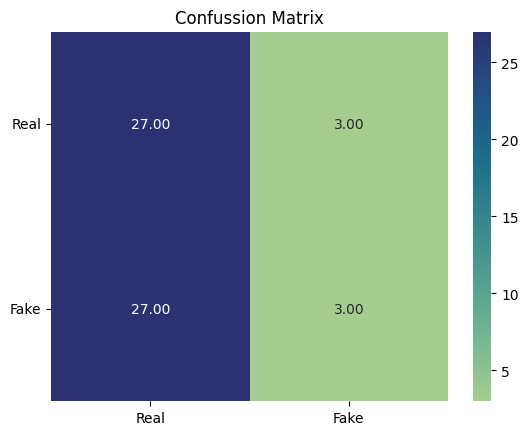

In [90]:
evaluate(out_model, dataloaders['val'])

In [84]:
#history_dic = train_model(model, dataloaders, optimizer, criterion, 3, device="cuda", history=True)



Epoch 0/2
----------
train Loss: 0.709 Acc: 0.522
val Loss: 0.693 Acc: 0.500
Epoch 1/2
----------
train Loss: 0.722 Acc: 0.500
val Loss: 0.681 Acc: 0.517
Epoch 2/2
----------
train Loss: 0.710 Acc: 0.513
val Loss: 0.681 Acc: 0.500


In [91]:
import matplotlib.pyplot as plt

def plot_loss(artdeco):
    train_loss = [x.detach().cpu().numpy() for x in history_dic['train_loss']]
    val_loss = [x.detach().cpu().numpy() for x in history_dic['val_loss']]

    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label="Training Loss", marker='o')
    plt.plot(val_loss, label="Validation Loss", marker='s')

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call this function after training
plot_loss(artdeco)


TypeError: 'NoneType' object is not subscriptable